In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [184]:
df =pd.read_csv("bank-full.csv")

In [185]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [186]:
df.shape

(41188, 21)

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [188]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Exploratory Data Analysis

#### Separating our numerical columns and catagorical columns 

In [189]:
catagorical_cols = df.select_dtypes("object")

numercial_cols = df.select_dtypes("number")

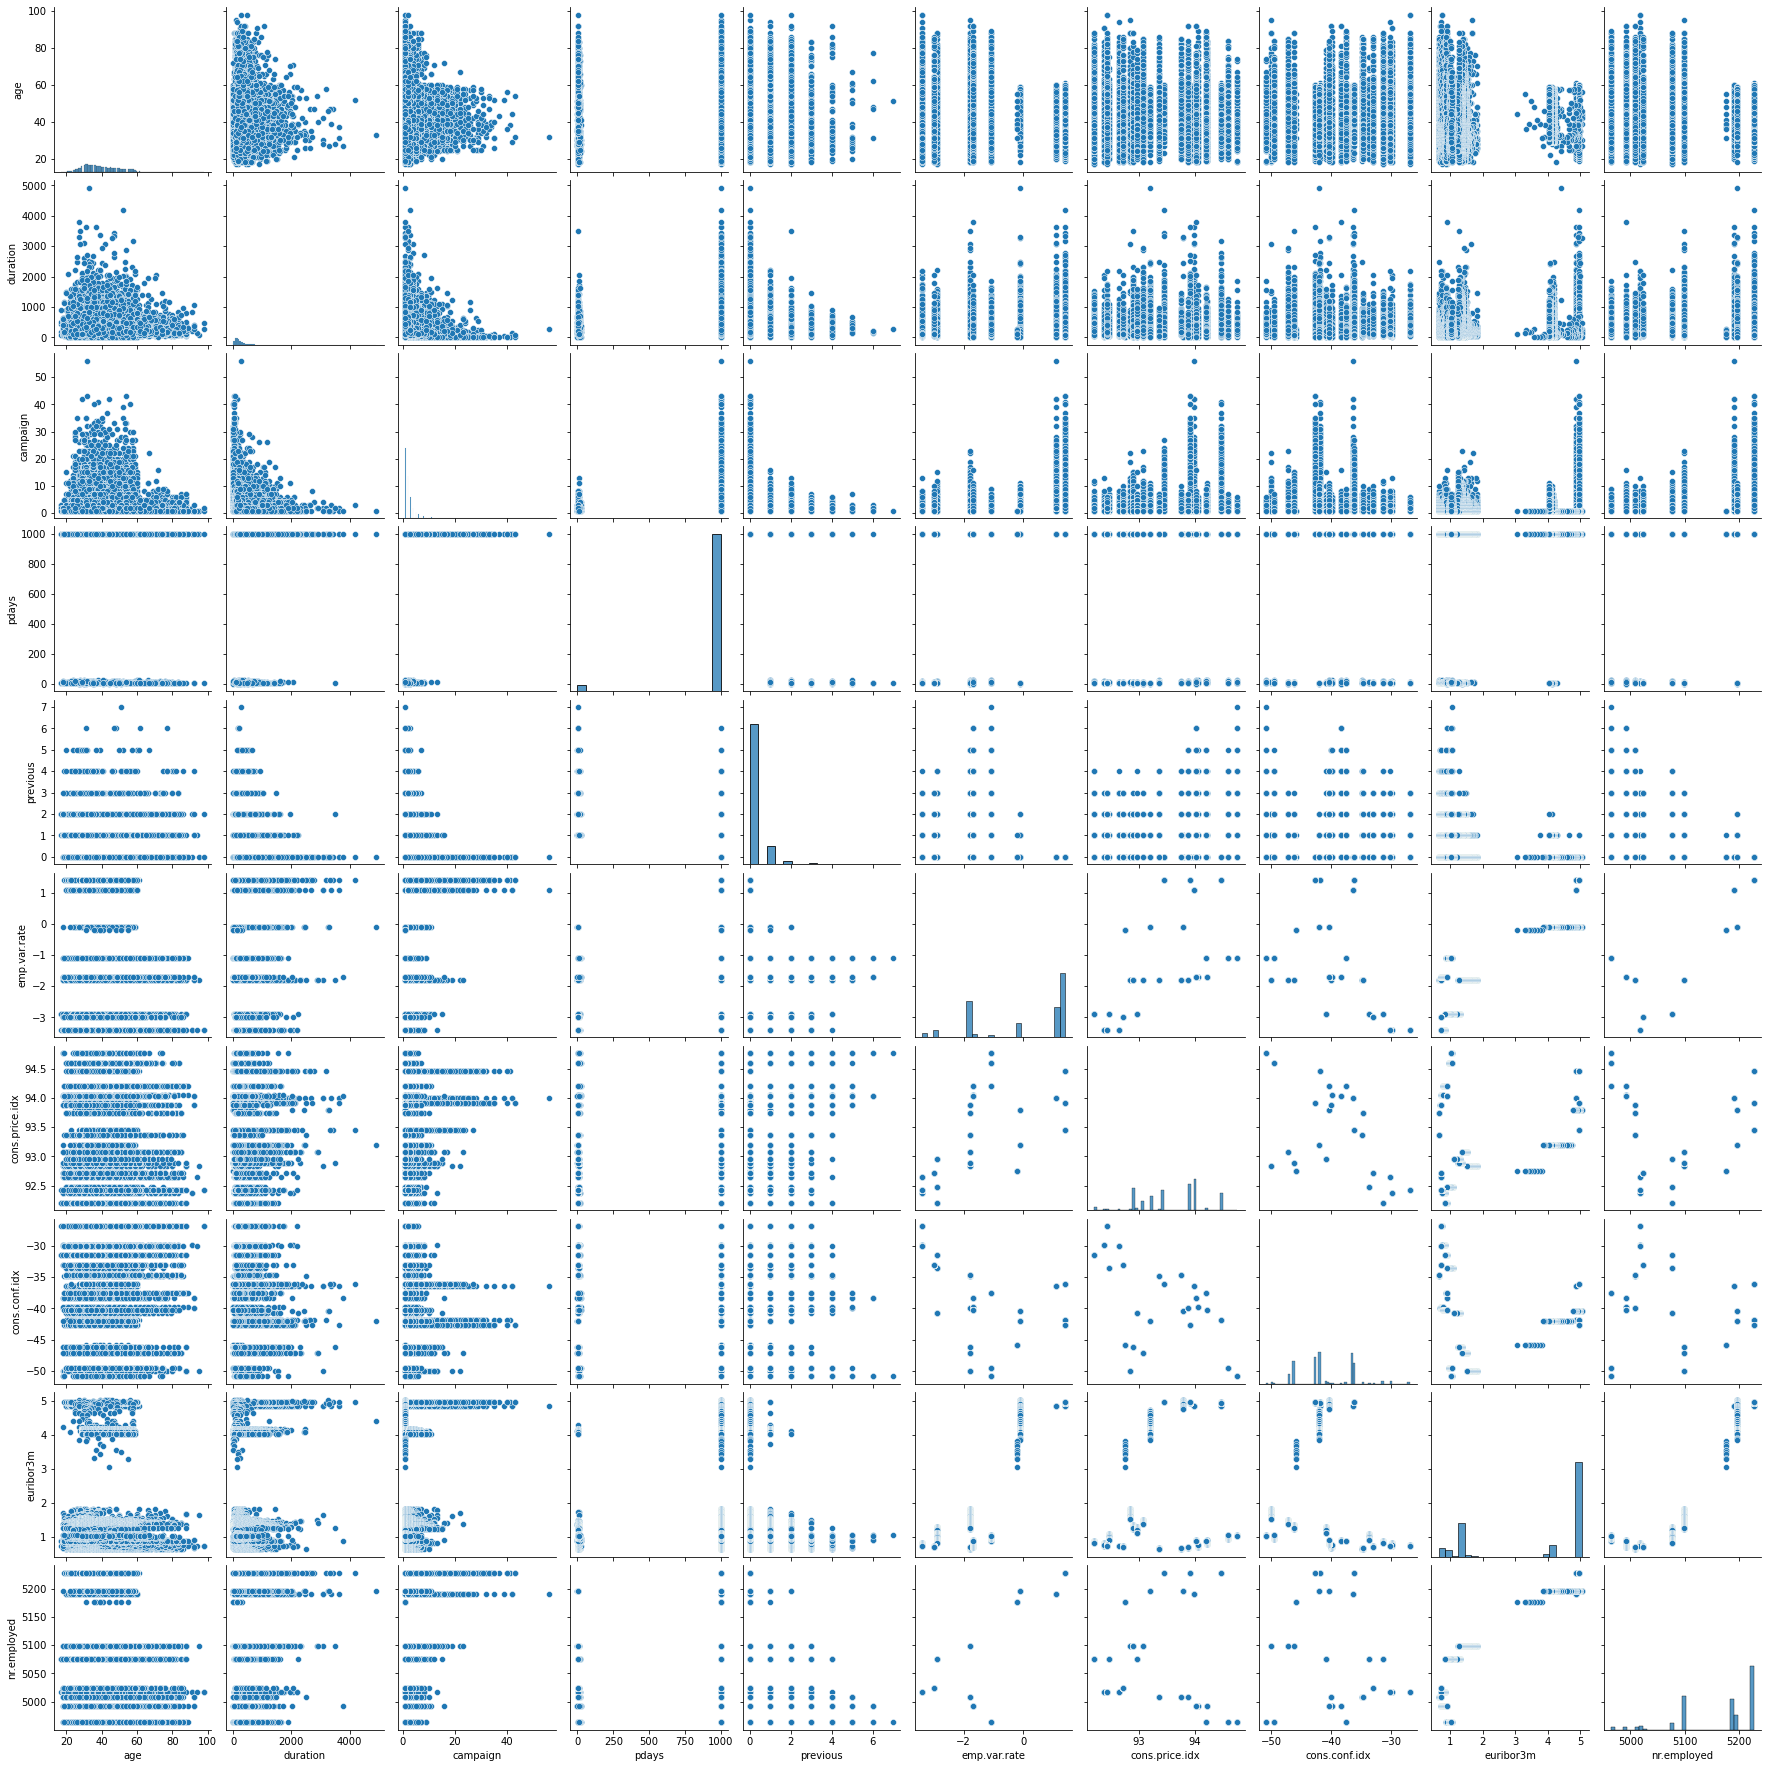

In [190]:
sns.pairplot(data=numercial_cols)

# Customers of various ages with/ without loan

<AxesSubplot:xlabel='age', ylabel='Count'>

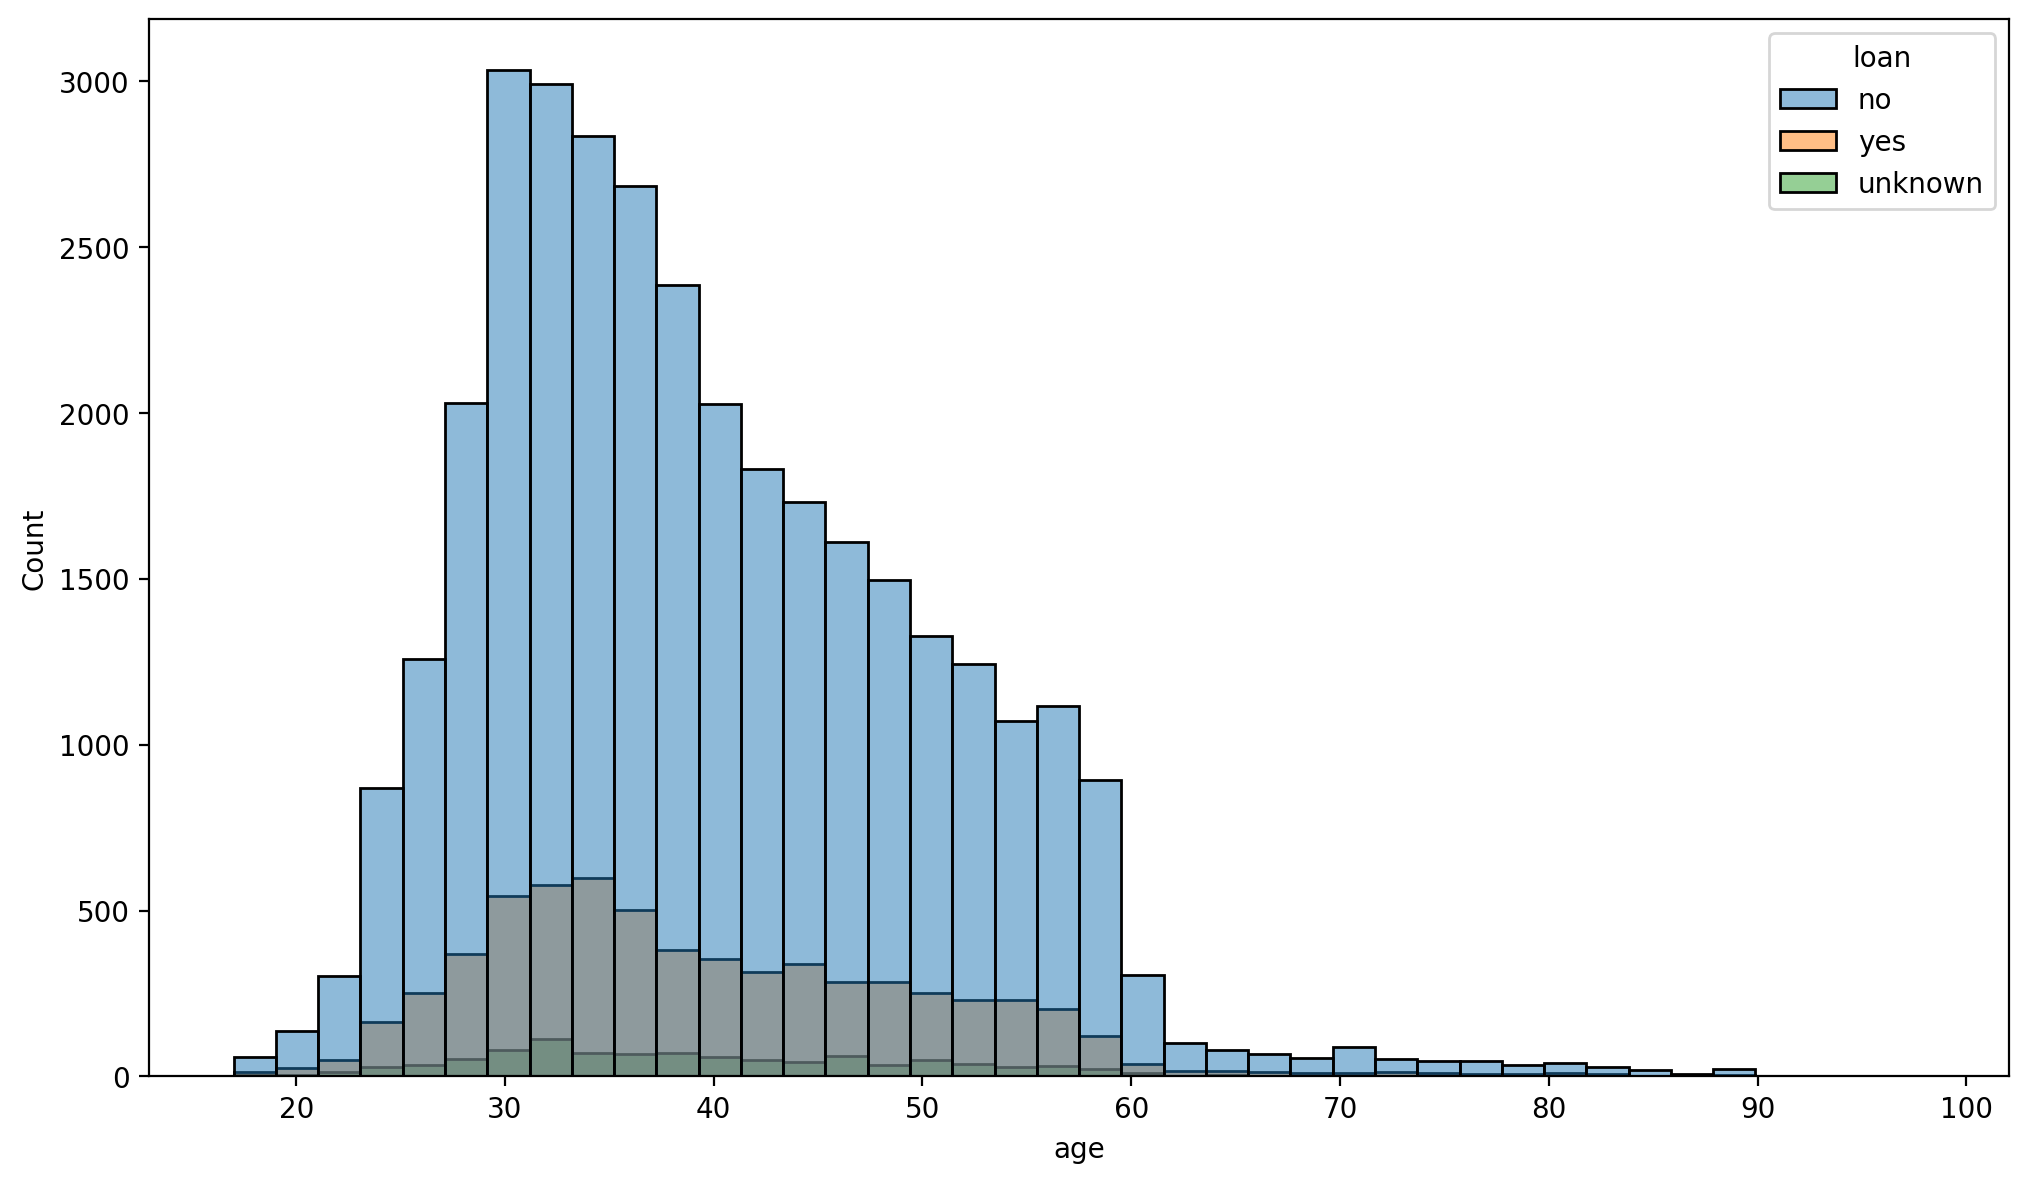

In [191]:
plt.figure(figsize=(12,7),dpi = 200)
sns.histplot(data=df,x="age",bins=40,hue = "loan")

##### Most people are of ages 30 to 50 years and majority of the people do not have a loan

# How many days have passed since last contacted our customer?

In [192]:
df["pdays"].value_counts()[0:5]

999    39673
3        439
6        412
4        118
9         64
Name: pdays, dtype: int64

In [193]:
#999 means customer was never contacted

In [194]:
df[df["pdays"]!=999].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
24108,37,admin.,married,university.degree,no,yes,no,telephone,nov,wed,...,1,6,1,success,-0.1,93.2,-42.0,4.286,5195.8,no
24264,48,management,married,university.degree,no,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24279,42,technician,married,professional.course,unknown,yes,no,cellular,nov,mon,...,1,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24397,50,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,1,3,1,success,-0.1,93.2,-42.0,4.191,5195.8,no
24482,36,self-employed,single,university.degree,no,yes,no,cellular,nov,mon,...,2,4,1,success,-0.1,93.2,-42.0,4.191,5195.8,no


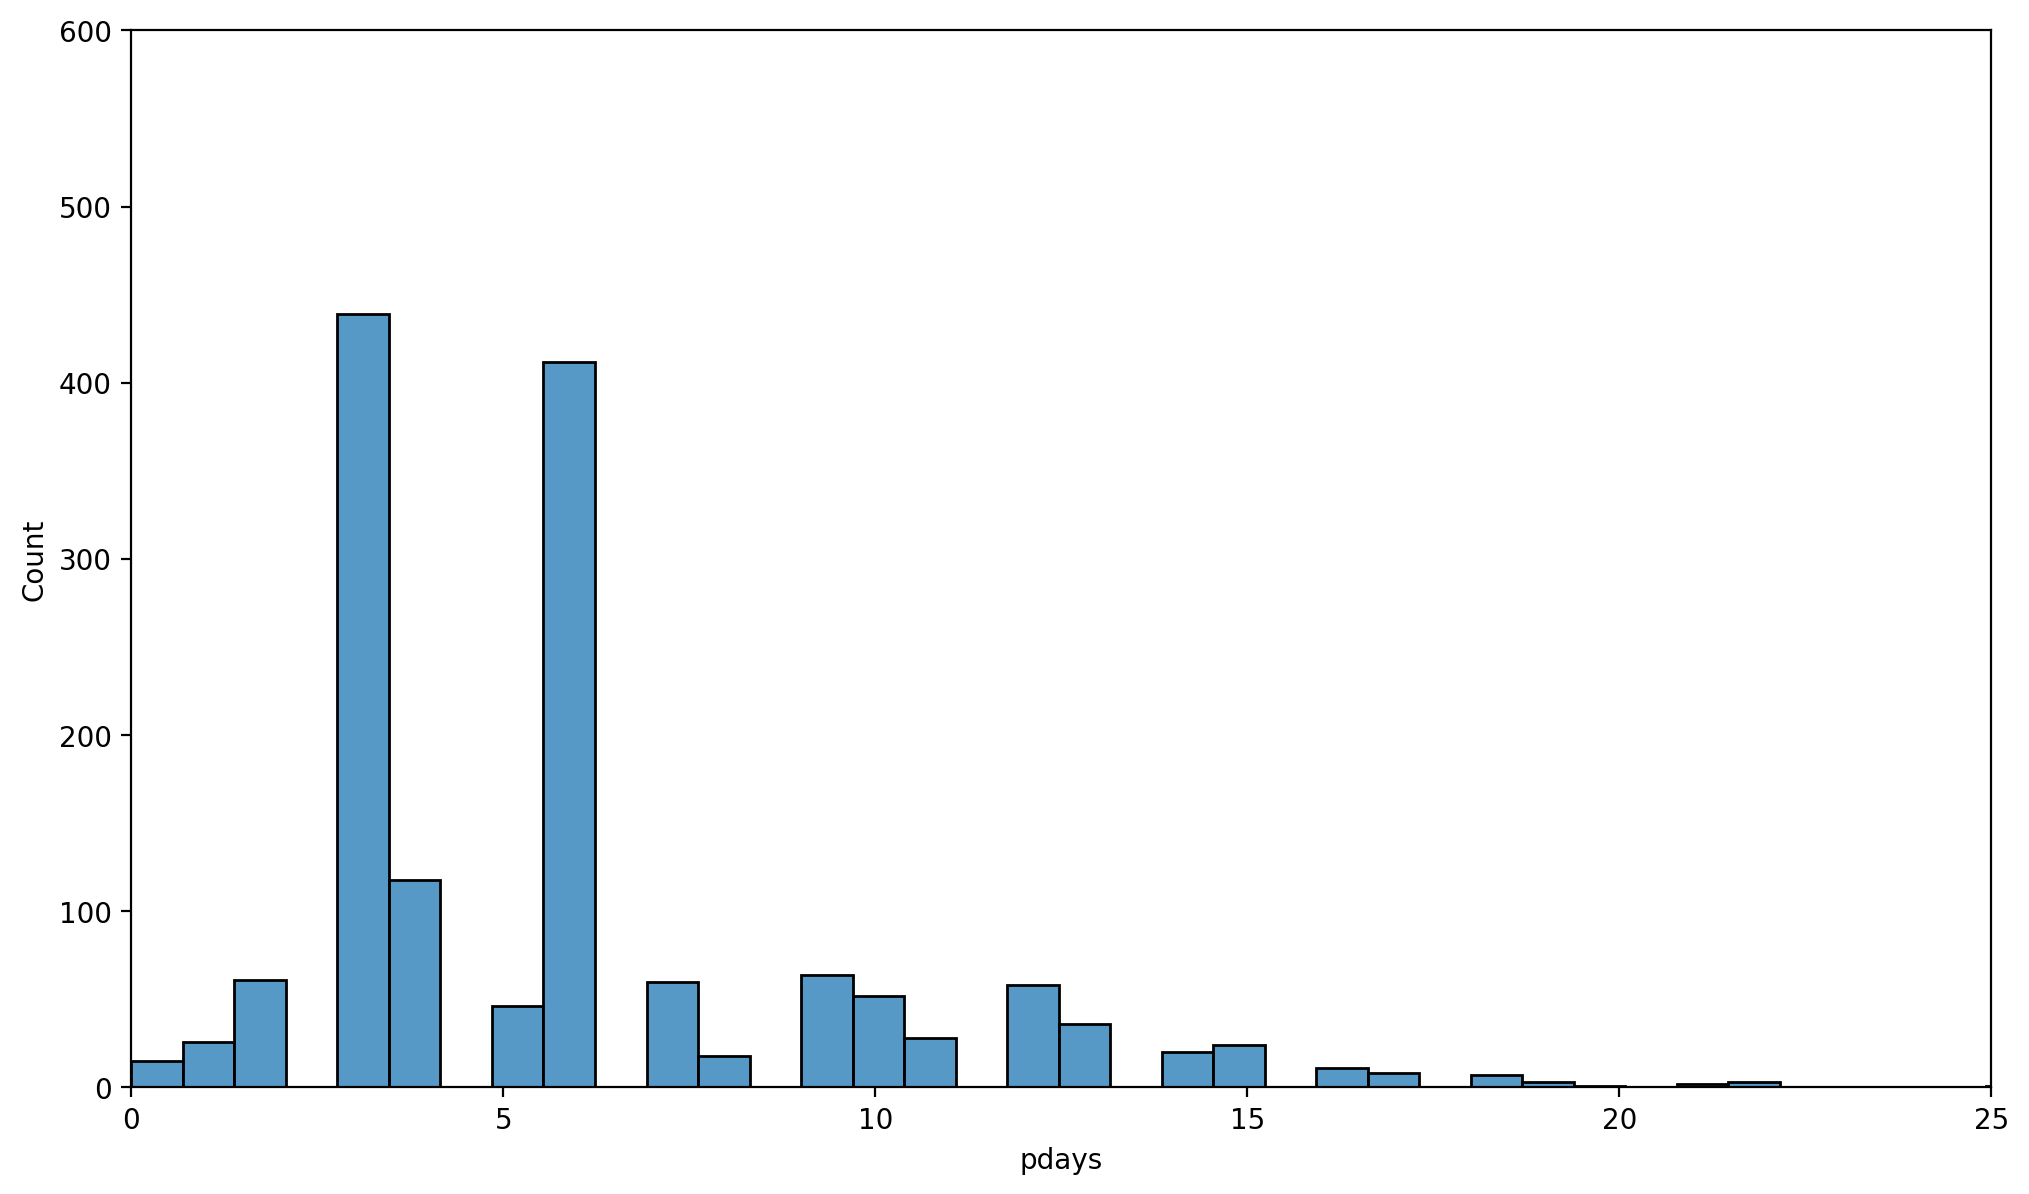

In [195]:
plt.figure(figsize=(12,7),dpi = 200)
sns.histplot(data=df[df["pdays"]!=999],x="pdays")
plt.xlim(0,25)
plt.ylim(0,600);

##### The customers that were contacted had mostly 3 - 7 days since last campaign contact

# Based on Job how many of customers have a loan

In [196]:
no_loan_df = df[df["loan"]!="unknown"]

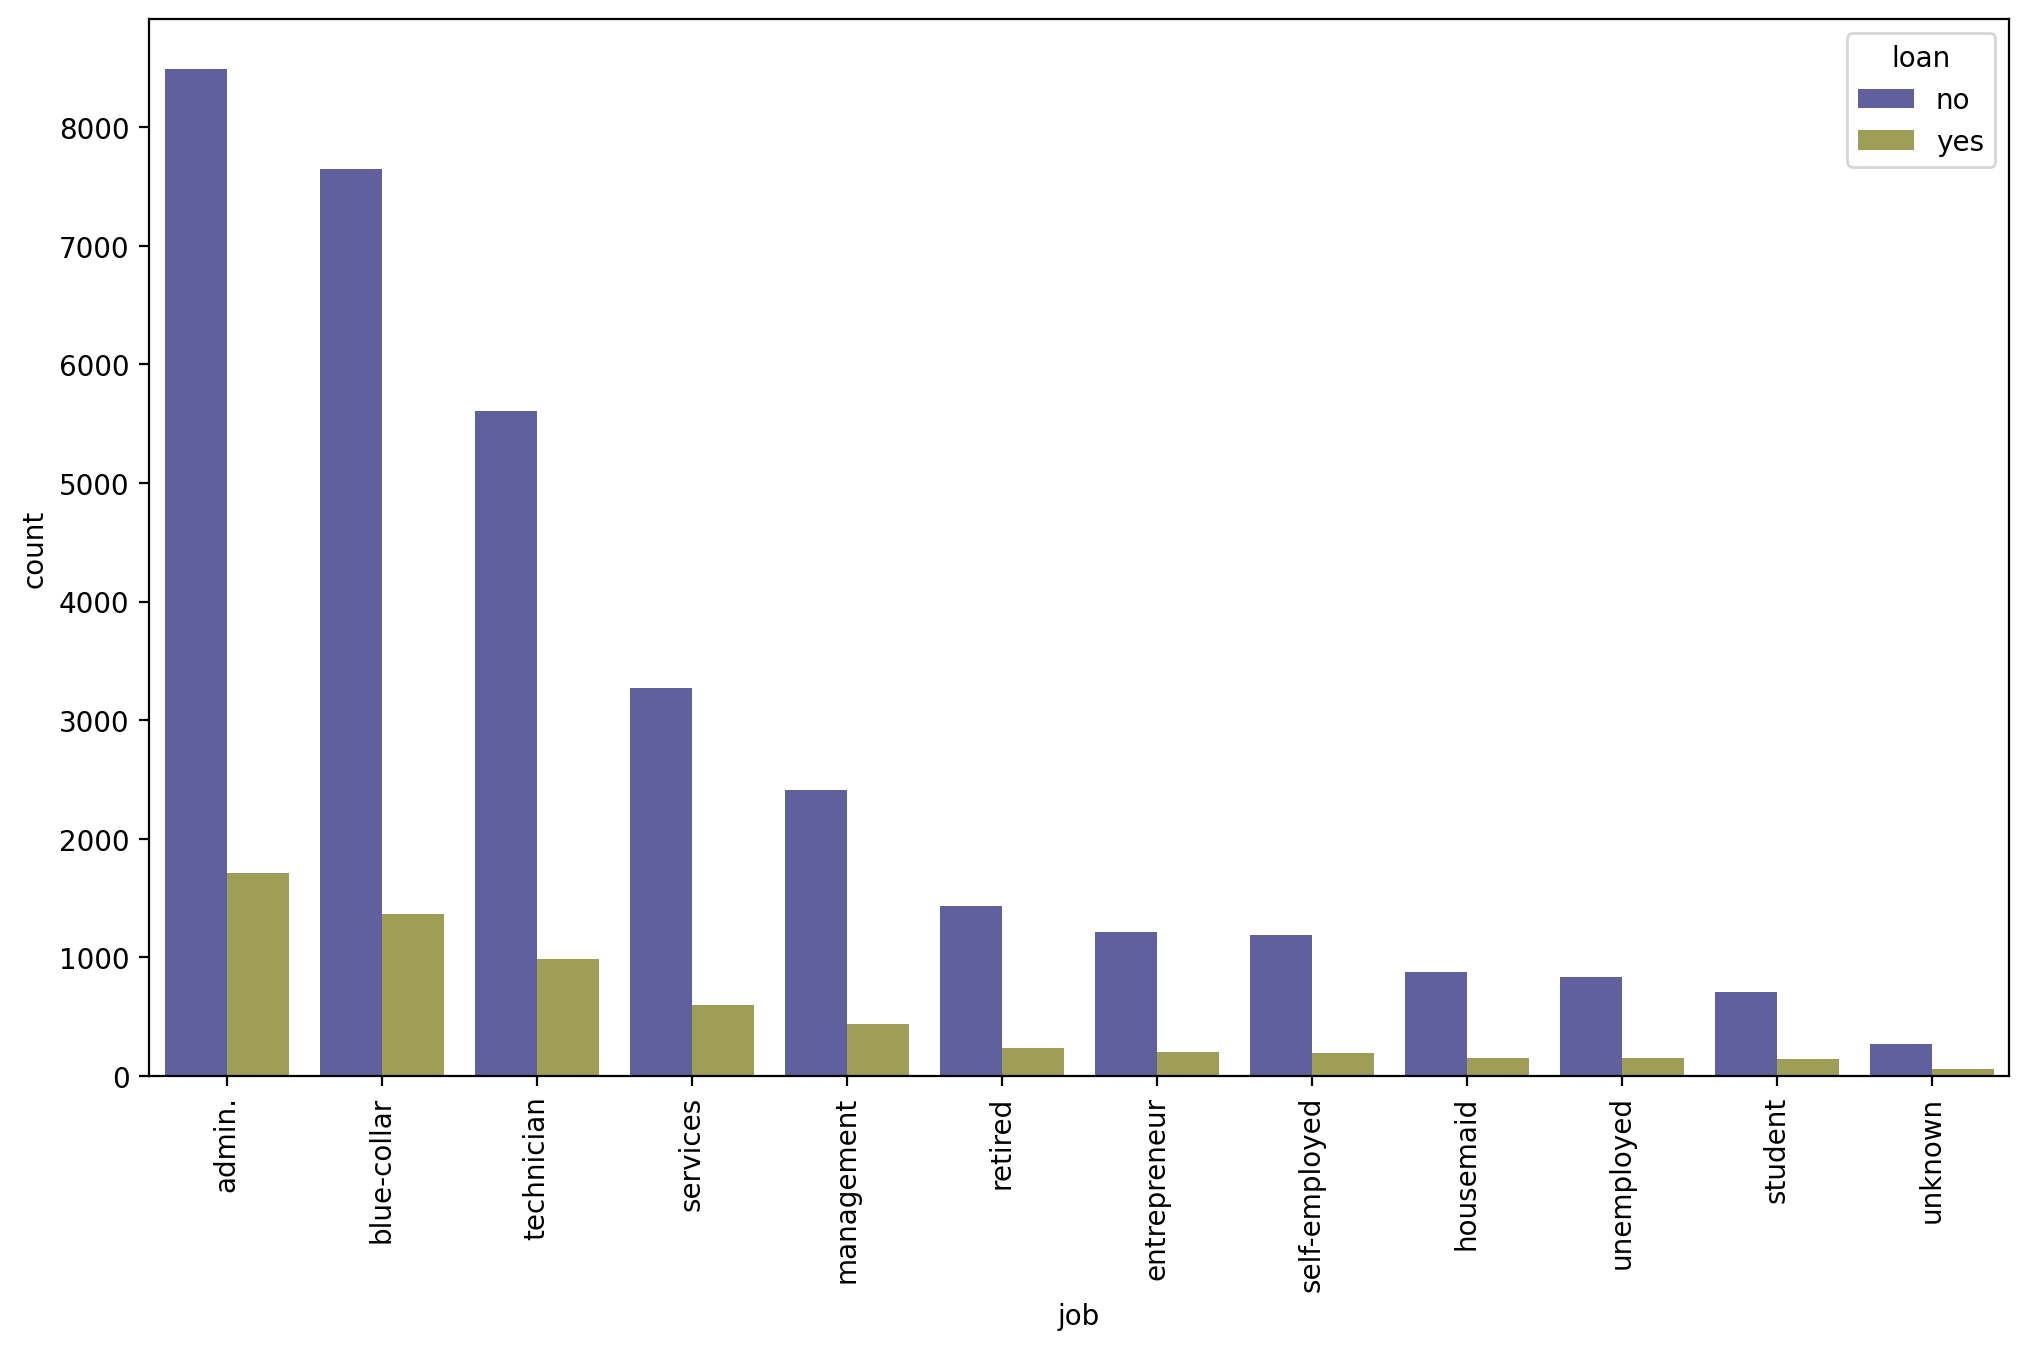

In [197]:
plt.figure(figsize=(12,7),dpi =200)
sns.countplot(data=no_loan_df,x="job",order=df["job"].value_counts().index,hue="loan",palette="gist_stern")
plt.xticks(rotation = 90);

##### Amin and blue collar workers have taken the most of the loans 

# Based on education how many of customers have a loan

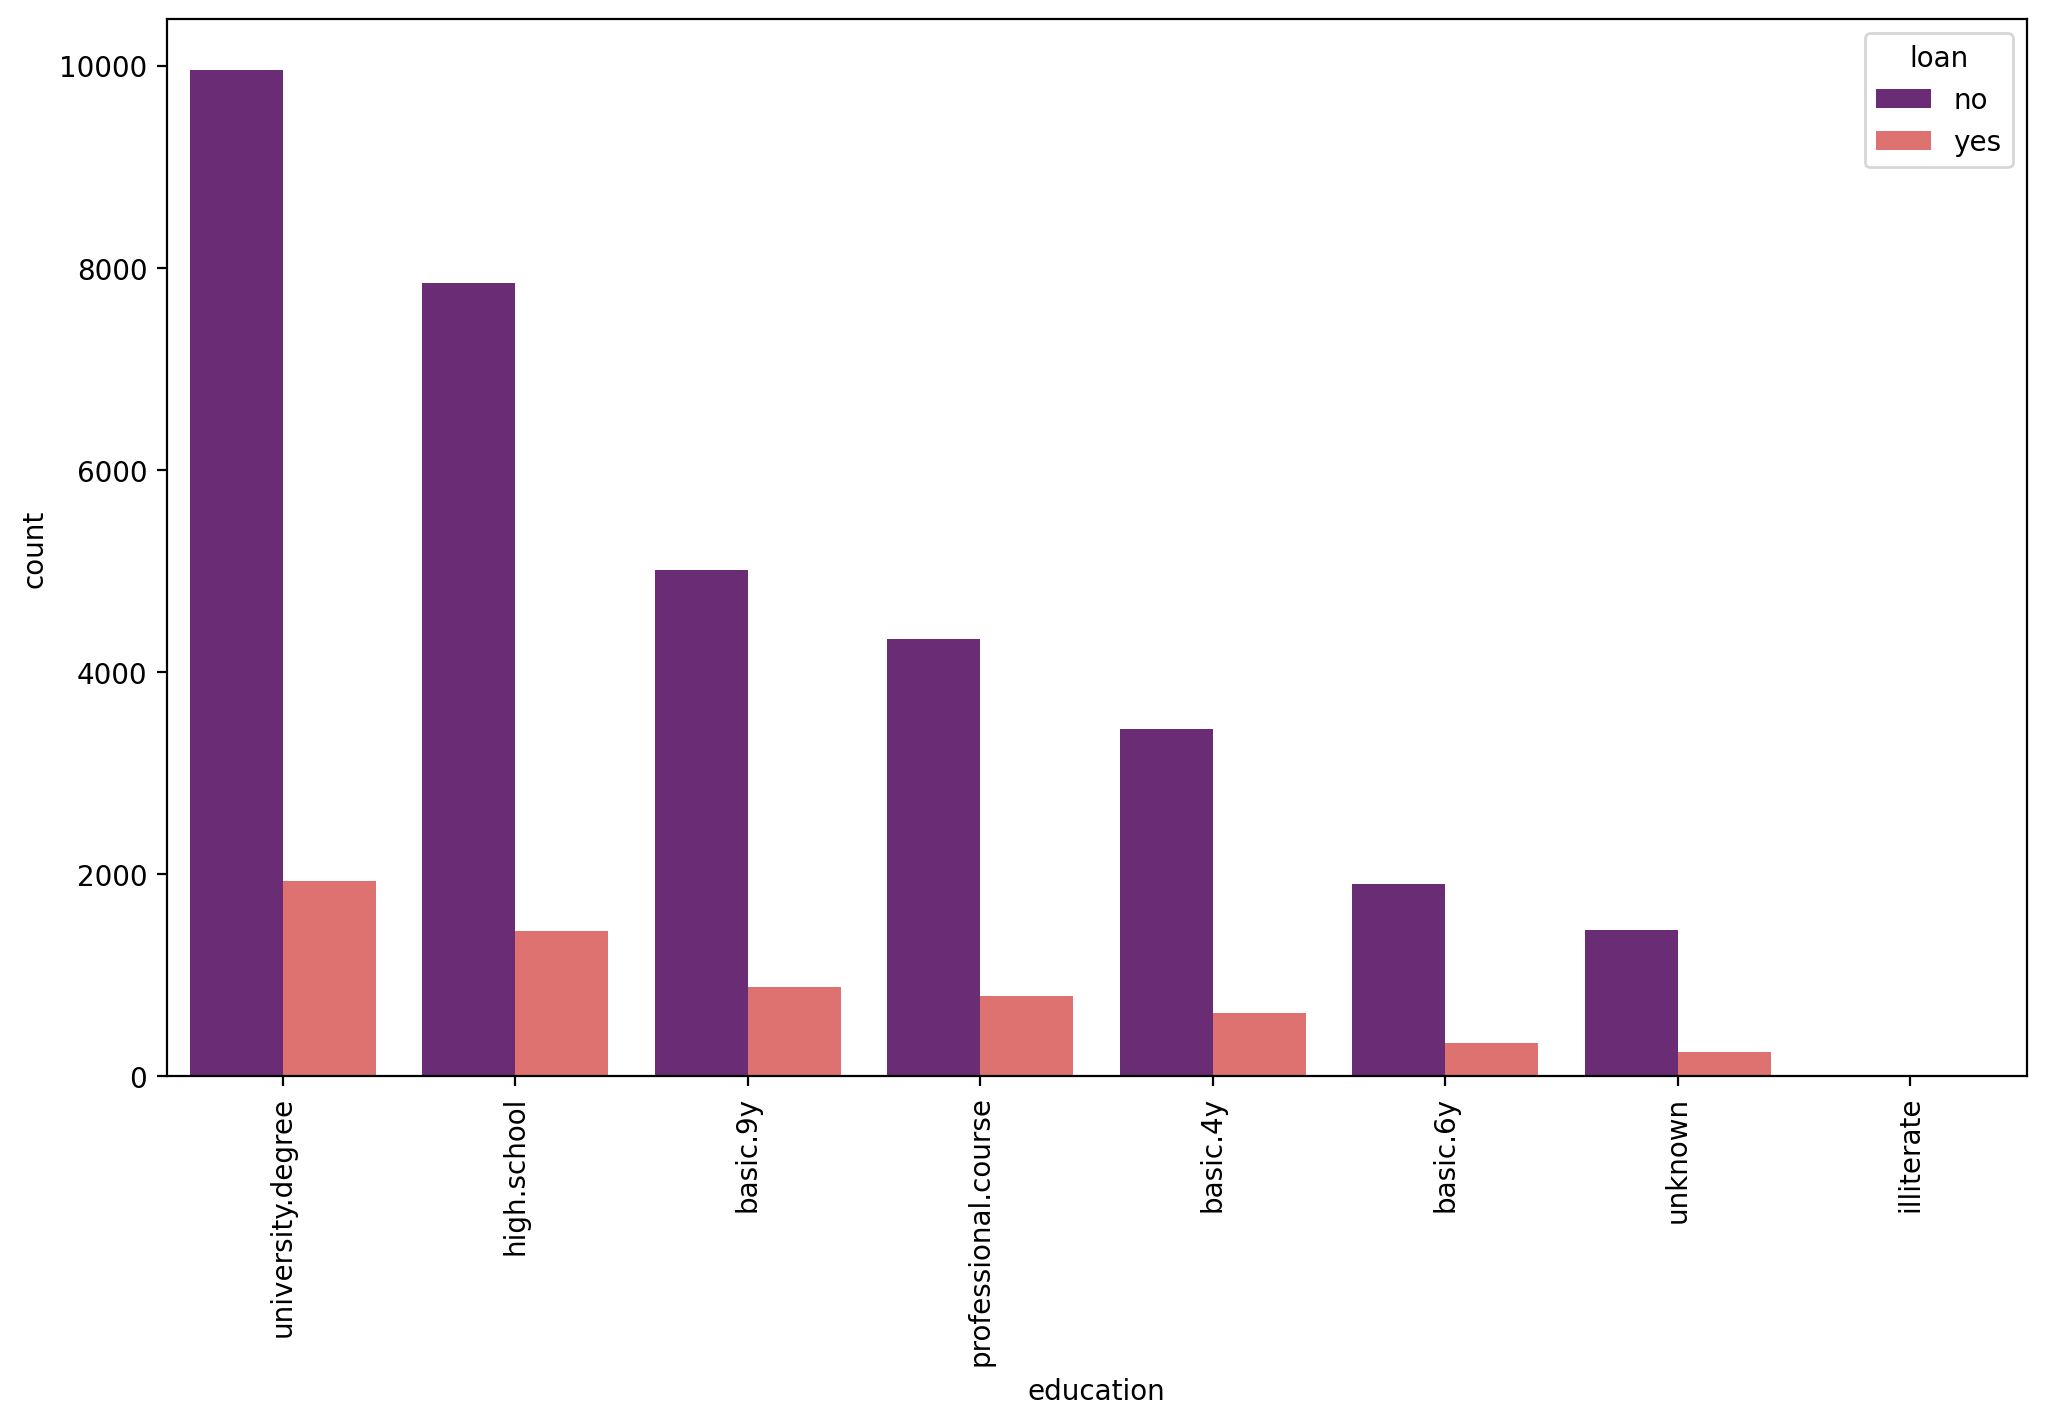

In [198]:
plt.figure(figsize=(12,7),dpi =200)
sns.countplot(data=no_loan_df,x="education",order=df["education"].value_counts().index,hue="loan",palette="magma")
plt.xticks(rotation = 90);

##### University degree holders and high school graduates have taken most loans 

# Based on education how many of customers defaulted on loan

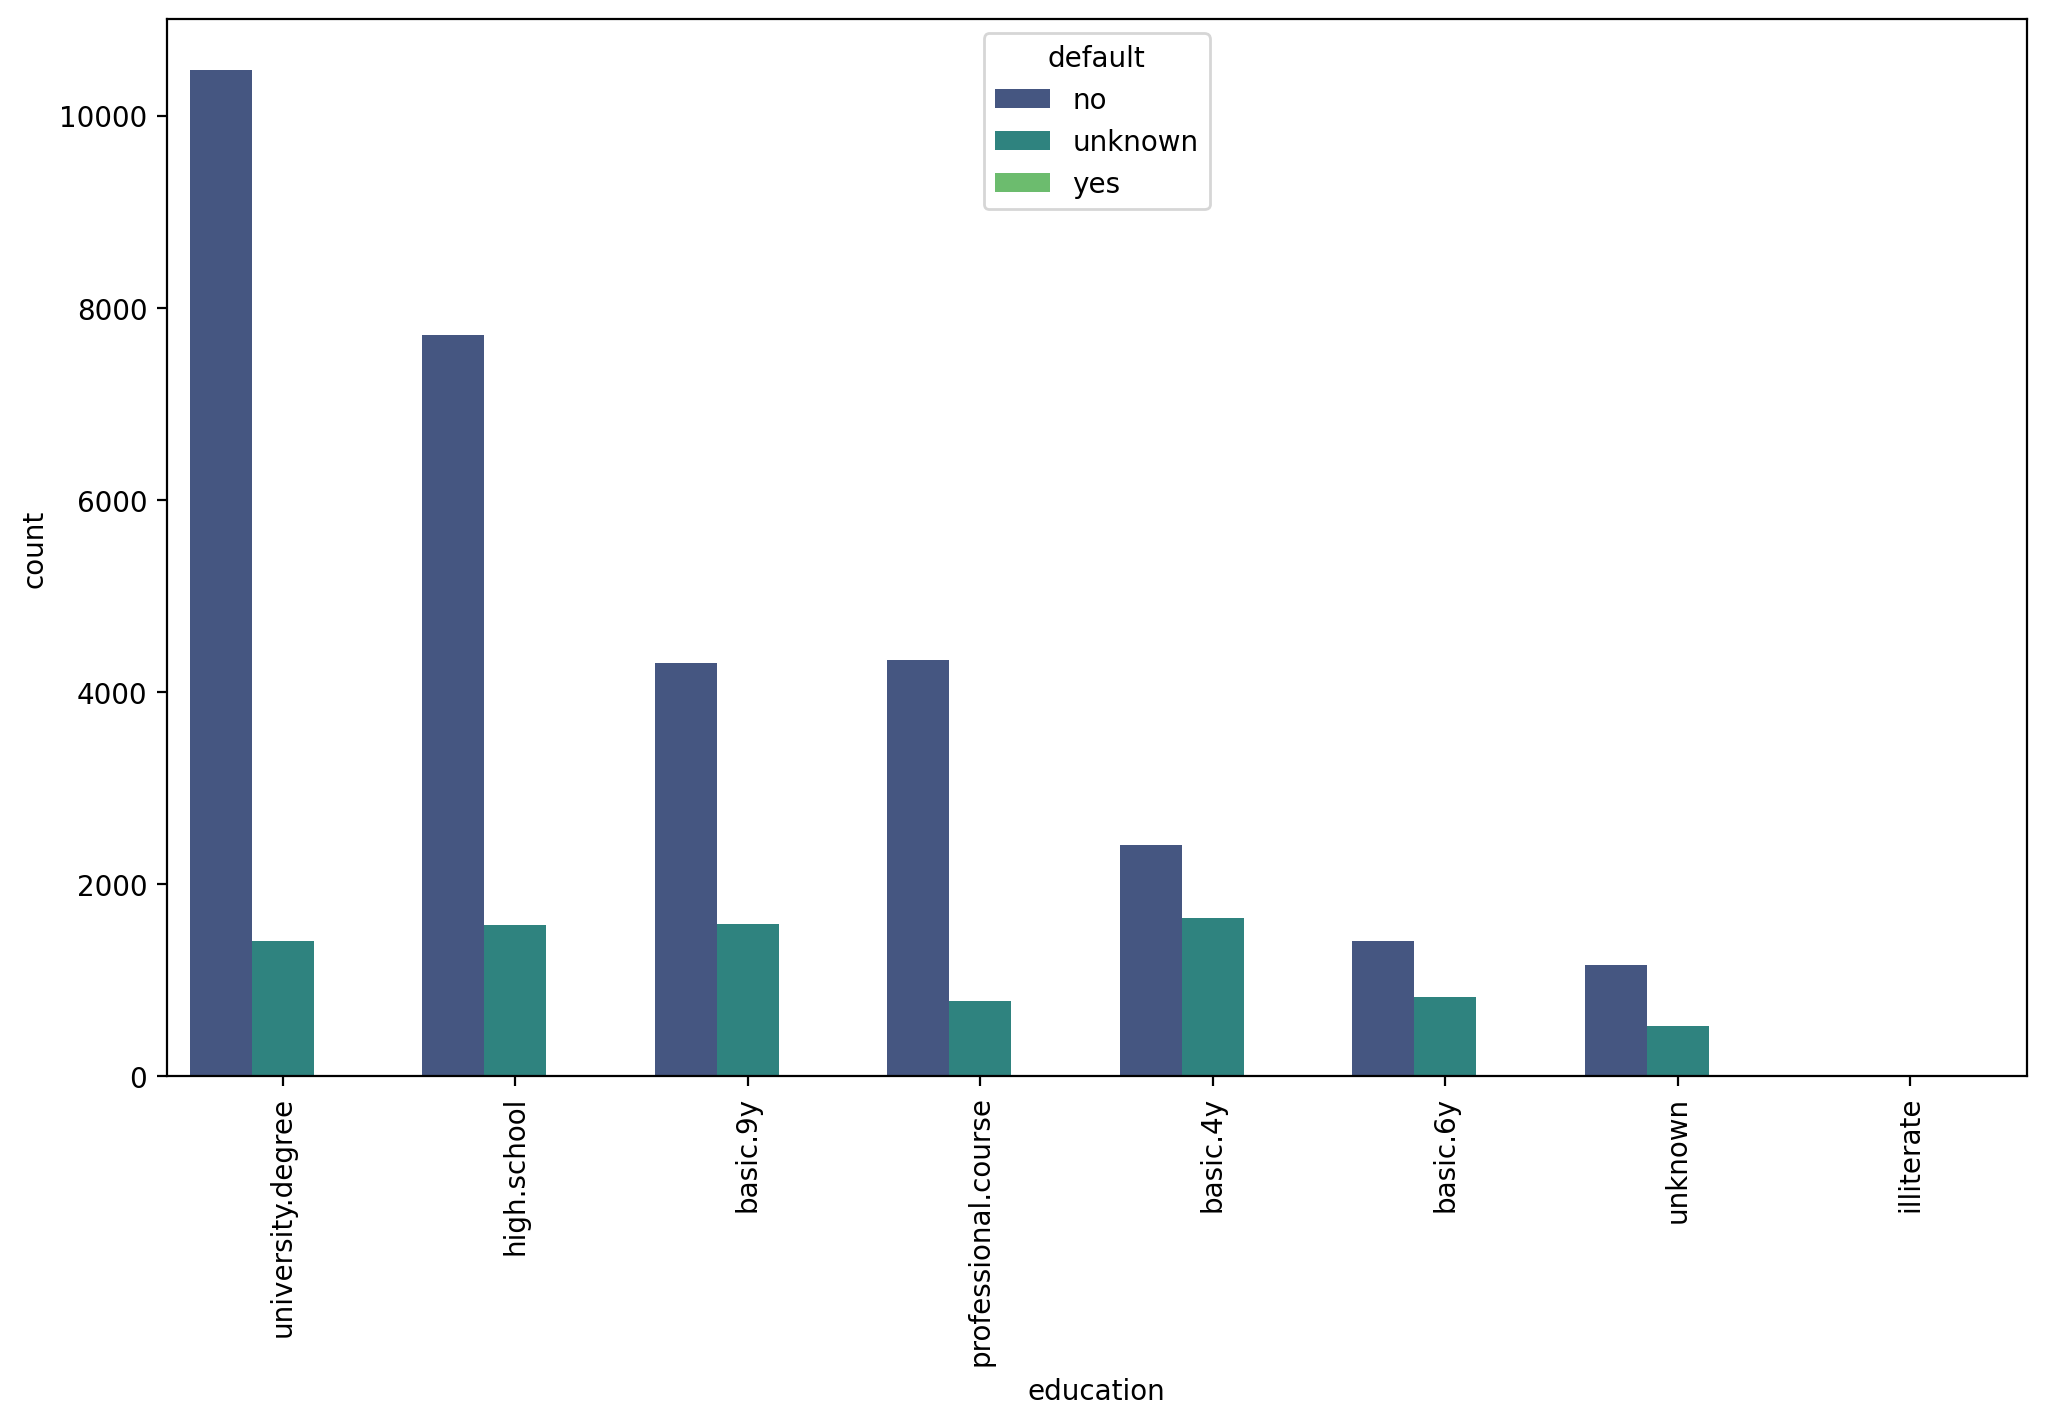

In [199]:
plt.figure(figsize=(12,7),dpi =200)
sns.countplot(data=no_loan_df,x="education",order=df["education"].value_counts().index,hue="default",palette="viridis")
plt.xticks(rotation = 90);

##### No customers defaulted on loans

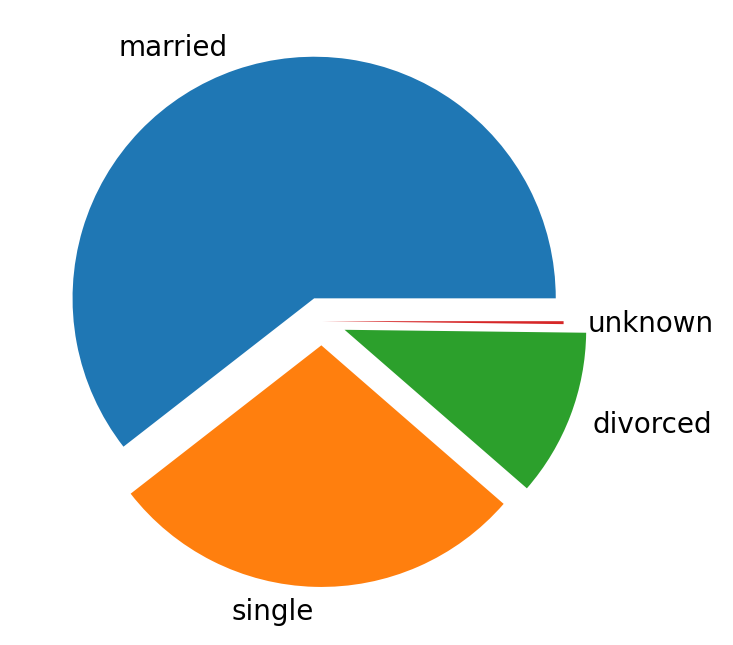

In [200]:
plt.figure(figsize=(6,4),dpi =200)
myexplode = [0.1, 0.1, .1,0]
plt.pie(df["marital"].value_counts().values,labels = df["marital"].value_counts().index,explode =myexplode);

##### Mostly married people are our customers. Buy one get one discounts can be given for couples

# Building the machine learning model

In [201]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### First we convert our dataset into dummy variables  

In [218]:
X = pd.get_dummies(df)

In [203]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,1,0,0,0,0,1,0,1,0


#### Scale the data 

In [204]:
from sklearn.preprocessing import StandardScaler

In [205]:
scaler = StandardScaler()

In [206]:
scaled_X = scaler.fit_transform(X)

# Lets find out the best n_cluster number for KMeans Algorithmn

#### Import the model 

In [214]:
from sklearn.cluster import KMeans

In [215]:
ssd = []
for k in range (2,10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
    

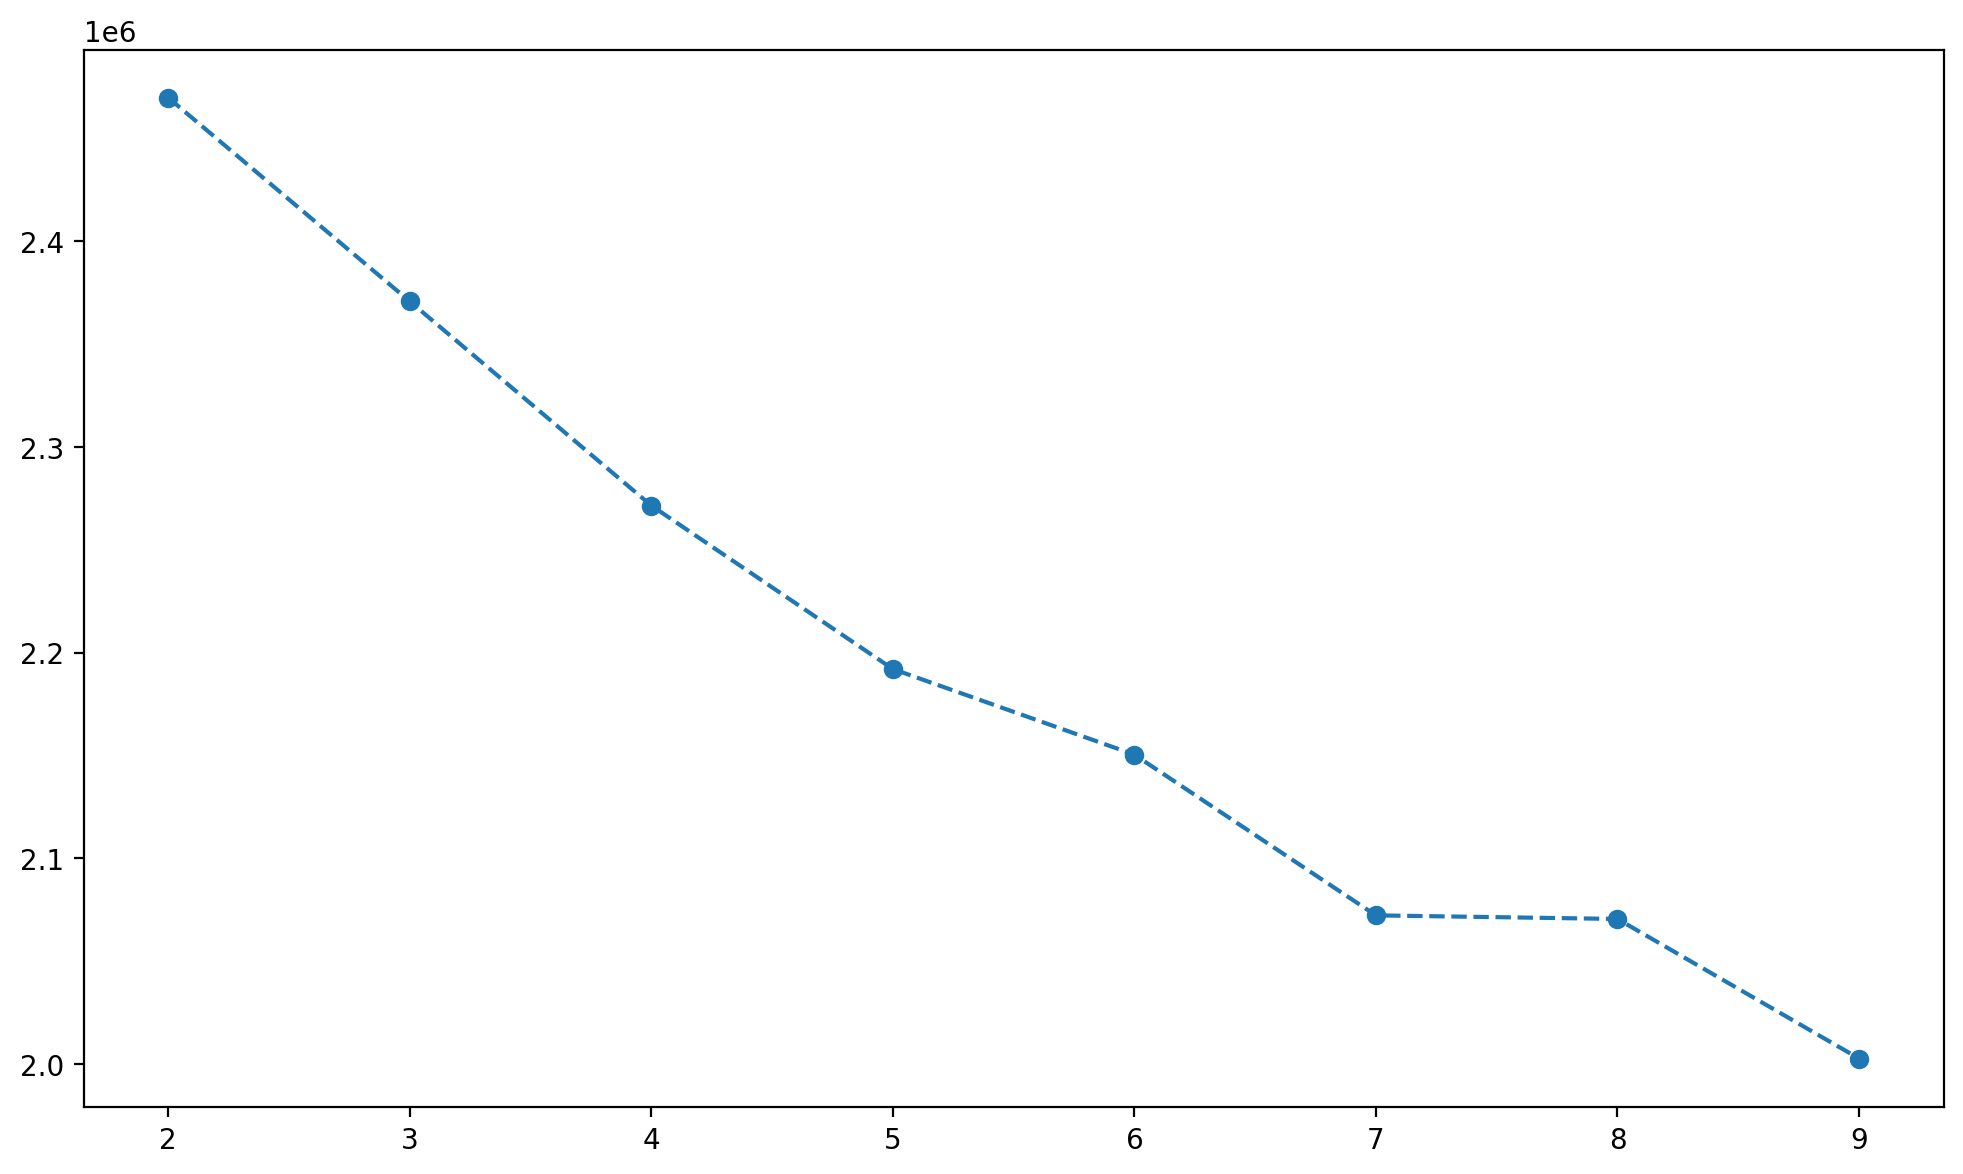

In [216]:
plt.figure(figsize=(12,7),dpi =200)
plt.plot(range (2,10),ssd,"o--");

In [217]:
pd.Series(ssd).diff()

0             NaN
1   -99005.582397
2   -99282.842060
3   -79482.656980
4   -41631.445642
5   -78121.657073
6    -1743.496064
7   -67838.793849
dtype: float64

#### n_cluster = 6 looks to be appropiate

In [208]:
model = KMeans(n_clusters=6)

In [209]:
cluster_labels = model.fit_predict(scaled_X)

In [210]:
cluster_labels

array([4, 4, 4, ..., 3, 3, 1])

#### Joining the cluster label with out X feature dataset 

In [211]:
X["Cluster"] = cluster_labels

In [212]:
X.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,4
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,4
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,4
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,4
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,0,1,0,1,0,4


# Finding the correlation between our clustered label and our X features

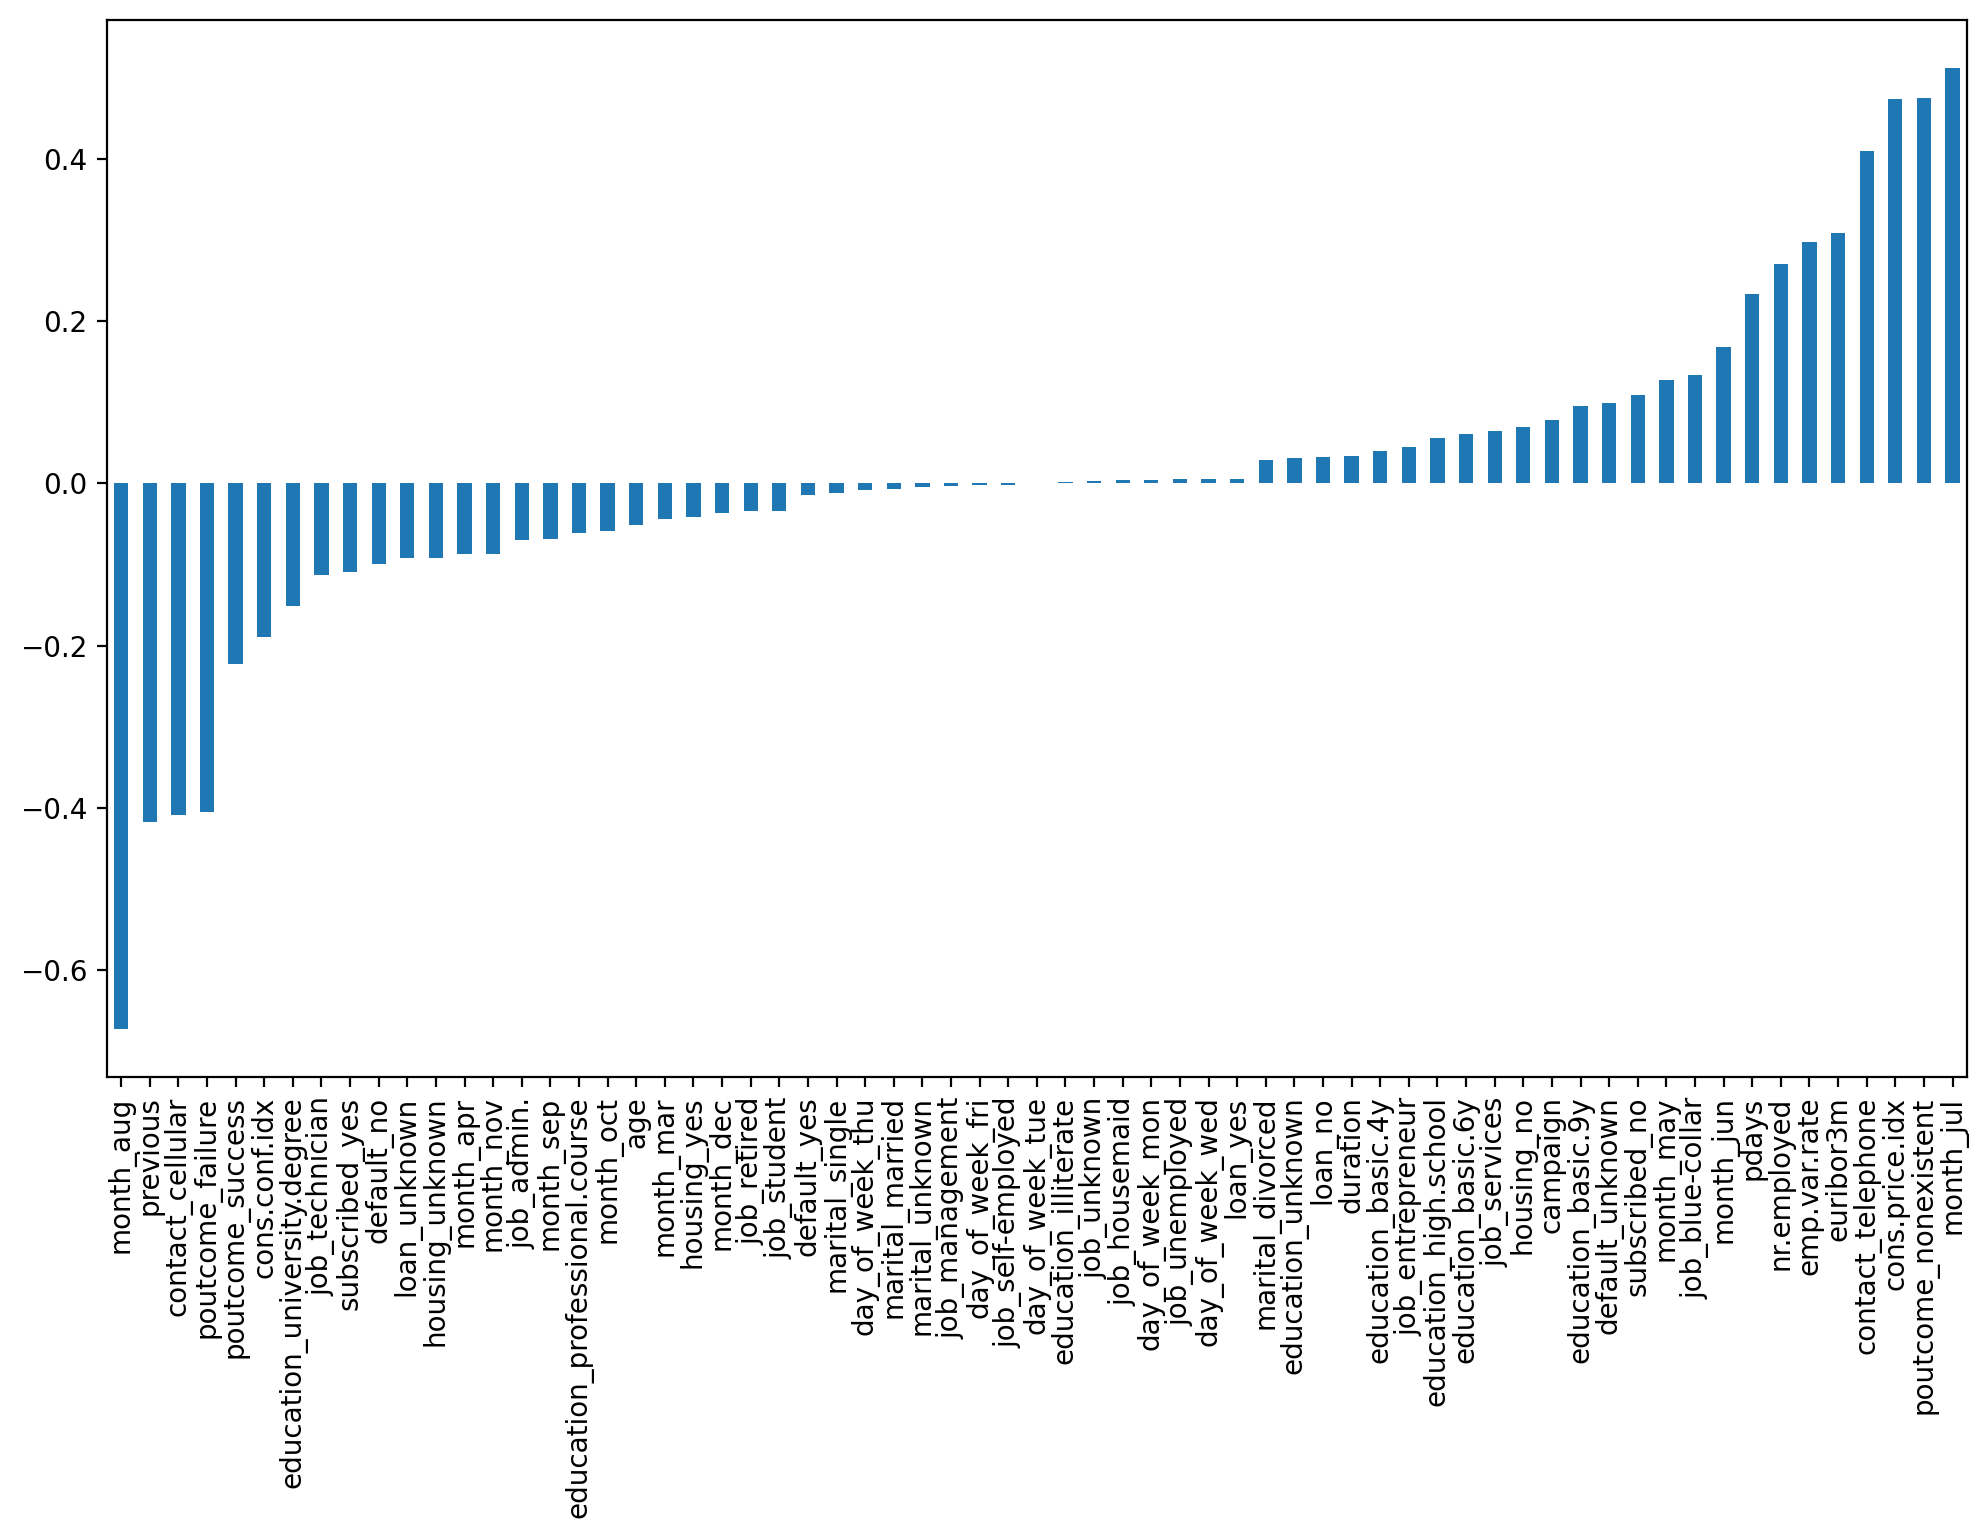

In [213]:
plt.figure(figsize=(12,7),dpi =200)
X.corr()["Cluster"].sort_values()[:-1].plot(kind = "bar");